# Import Libraries

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Get data

In [62]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

In [63]:
dataset.head(5)

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Visualize data

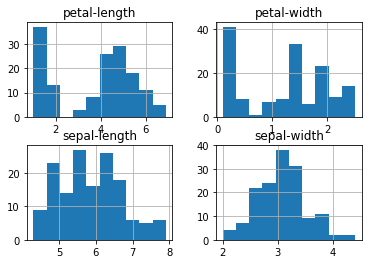

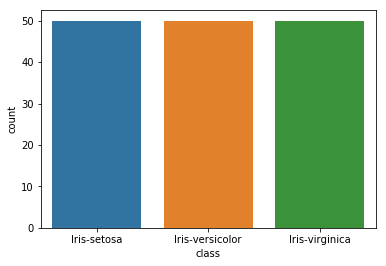

In [64]:
dataset.hist()
plt.show()
sns.countplot(x='class',data=dataset)

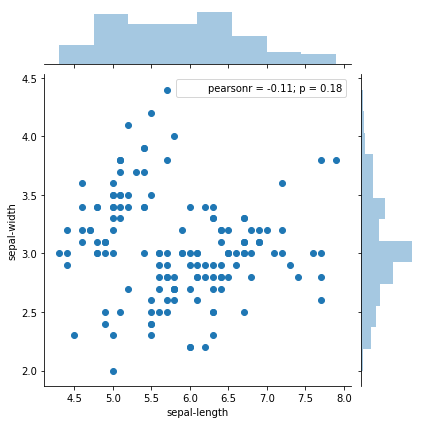

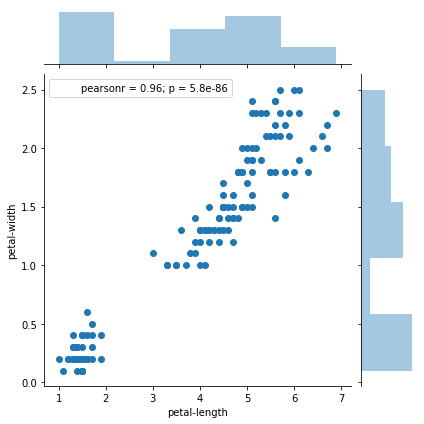

In [65]:
sns.jointplot(x='sepal-length',y='sepal-width',data=dataset)
sns.jointplot(x='petal-length',y='petal-width',data=dataset)

# Train and Test models

In [66]:
X = dataset[['sepal-length','sepal-width','petal-length','petal-width']]
y = dataset['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [67]:
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('K Nearest Neighbours', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier(n_estimators=100)))
models.append(('Support Vector Machine', SVC()))
results = []
names = []
best=0
bestname=""
print("\n")
for name, model in models:
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    r=cv_results.mean()
    if r>best:
        best=r
        bestname=name
    msg = "%s: %f (%f)" % (name, r, cv_results.std())
    print(msg)
print("\n\nBest Model for the dataset:\n%s, with accuracy:%f"%(bestname,best))



Logistic Regression: 0.941667 (0.053359)
K Nearest Neighbours: 0.983333 (0.033333)
Decision Tree: 0.958333 (0.055902)
Random Forest: 0.958333 (0.055902)
Support Vector Machine: 0.975000 (0.038188)


Best Model for the dataset:
K Nearest Neighbours, with accuracy:0.983333
